## Linear Regression between TV and Sales

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
raw_data=pd.read_csv('advertising.csv')
raw_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
raw_data.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
raw_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


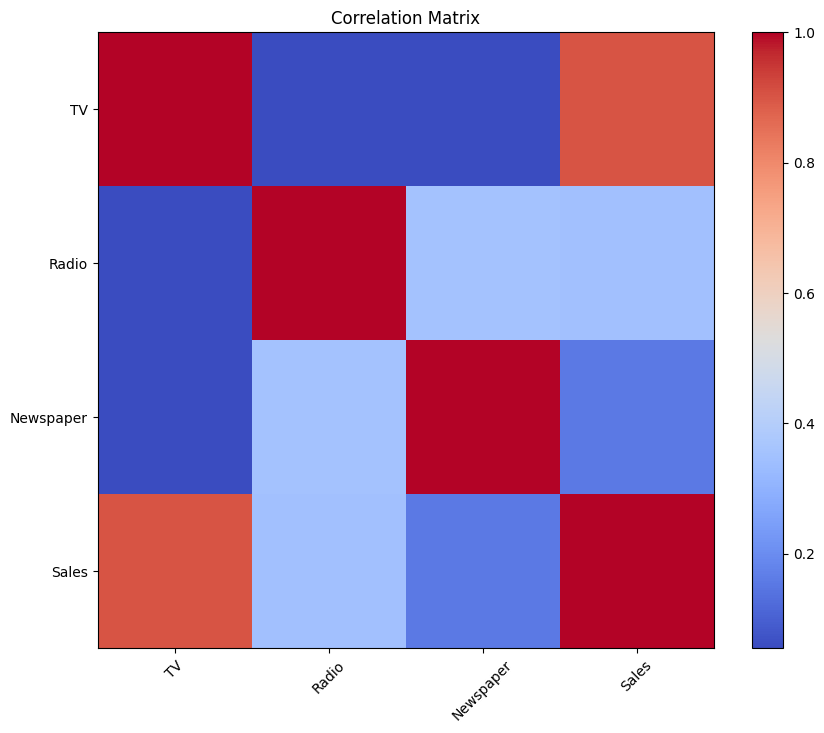

In [7]:
# Since there are no null values, we can proceed with the analysis.
# Let's check the correlation between the features and the target variable
correlation = raw_data.corr()
print(correlation)
# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()

[[6.97482149]
 [0.05546477]]
Predicted Sales for TV spending of 230: 19.731718696228327


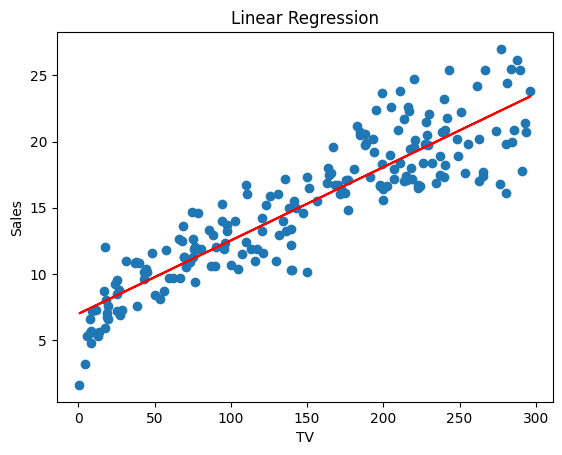

Mean Squared Error: 5.2177438977951285
R^2: 0.8121757029987414


In [33]:
# Performing a linear regression analysis mathematically

X=np.array(raw_data['TV']).reshape(-1,1)
y=np.array(raw_data['Sales']).reshape(-1,1)

ones=np.ones(X.shape[0]).reshape(-1,1)

X_new=np.hstack((ones,X))

theta=(np.linalg.pinv(X_new.T@X_new))@X_new.T@y
print(theta)
b=theta[0][0]
m=theta[1][0]

x_test=230
y_test=m*x_test+b
print(f'Predicted Sales for TV spending of {x_test}: {y_test}')

# Visualizing the regression line
plt.scatter(X,y)
plt.plot(X, m*X+b, color='red')
plt.title('Linear Regression')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# Error
# Calculating the error using Mean Squared Error (MSE)
mse = np.mean((y - (m * X + b)) ** 2)
print(f'Mean Squared Error: {mse}')
r2 = 1 - (np.sum((y - (m * X + b)) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f'R^2: {r2}')




Mean Squared Error (sklearn): 6.101072906773963
R^2 (sklearn): 0.802561303423698


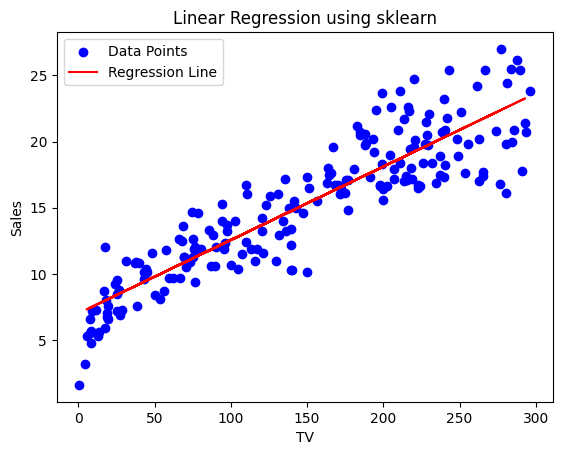

In [34]:
## Performing a linear regression analysis using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the error using Mean Squared Error (MSE)
mse_sklearn = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (sklearn): {mse_sklearn}')
r2_sklearn = r2_score(y_test, y_pred)
print(f'R^2 (sklearn): {r2_sklearn}')

# Visualizing the regression line using sklearn
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression using sklearn')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()